In [66]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import (
    PolynomialFeatures,
    OneHotEncoder
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')



In [67]:
train_test2 = pd.read_csv('../../data/daily_sunspots_time_series_1850-01_2024-05.csv')

In [68]:
train_test2

,date,year,month,day,date_frac,counts,std,nobs,indicator
0,1850-01-01,1850,1,1,1850.001,253,19.6,1,NaN
1,1850-01-02,1850,1,2,1850.004,162,15.5,1,NaN
2,1850-01-03,1850,1,3,1850.007,217,18.1,1,NaN
3,1850-01-04,1850,1,4,1850.010,99,12.0,1,NaN
4,1850-01-05,1850,1,5,1850.012,108,12.6,1,NaN
...,...,...,...,...,...,...,...,...,...
63668,2024-04-26,2024,4,26,2024.318,141,29.9,30,*
63669,2024-04-27,2024,4,27,2024.321,139,25.9,29,*
63670,2024-04-28,2024,4,28,2024.324,119,22.0,25,*
63671,2024-04-29,2024,4,29,2024.327,100,15.3,38,*


In [69]:
# train_test2 = train_test2[['date','day','month','year','counts']]

In [70]:
# train_test2

In [71]:
11*365

4015

In [72]:
# !pip install prophet

In [73]:
import pandas as pd
from prophet import Prophet

In [74]:
df_prophet = train_test2[['date','counts']]



df_prophet.describe()

,counts
count,63673.000000
mean,83.410174
std,76.875804
min,0.000000
25%,21.000000
50%,64.000000
75%,128.000000
max,528.000000


In [75]:
# df_prophet = df_prophet.set_index(df_prophet['date'])
df_prophet


,date,counts
0,1850-01-01,253
1,1850-01-02,162
2,1850-01-03,217
3,1850-01-04,99
4,1850-01-05,108
...,...,...
63668,2024-04-26,141
63669,2024-04-27,139
63670,2024-04-28,119
63671,2024-04-29,100


In [76]:
# df_prophet.drop('date', axis=1)

In [77]:
df_prophet = df_prophet.rename(columns={'date': 'ds', 'counts': 'y'})
df_prophet

,ds,y
0,1850-01-01,253
1,1850-01-02,162
2,1850-01-03,217
3,1850-01-04,99
4,1850-01-05,108
...,...,...
63668,2024-04-26,141
63669,2024-04-27,139
63670,2024-04-28,119
63671,2024-04-29,100


In [78]:
m = Prophet()
m.fit(df_prophet)

11:44:29 - cmdstanpy - INFO - Chain [1] start processing
11:44:51 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
# Python
future = m.make_future_dataframe(periods=22*365)
future.tail()

,ds
71698,2046-04-21
71699,2046-04-22
71700,2046-04-23
71701,2046-04-24
71702,2046-04-25


In [80]:
df_prophet
m
future

,ds
0,1850-01-01
1,1850-01-02
2,1850-01-03
3,1850-01-04
4,1850-01-05
...,...
71698,2046-04-21
71699,2046-04-22
71700,2046-04-23
71701,2046-04-24


In [81]:

# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
71698,2046-04-21,-11.135604,-750.290438,726.710588
71699,2046-04-22,-11.049250,-760.863496,746.383069
71700,2046-04-23,-10.632988,-743.434079,727.398956
71701,2046-04-24,-10.785455,-762.124005,737.483597
71702,2046-04-25,-10.583502,-744.465425,754.028144


In [82]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
71698,2046-04-21,-9.668123,-750.290438,726.710588,-761.536040,721.547969,-1.467482,-1.467482,-1.467482,-0.236474,-0.236474,-0.236474,-1.231008,-1.231008,-1.231008,0.0,0.0,0.0,-11.135604
71699,2046-04-22,-9.673891,-760.863496,746.383069,-761.642960,721.559174,-1.375359,-1.375359,-1.375359,-0.185510,-0.185510,-0.185510,-1.189850,-1.189850,-1.189850,0.0,0.0,0.0,-11.049250
71700,2046-04-23,-9.679659,-743.434079,727.398956,-761.749880,721.570379,-0.953329,-0.953329,-0.953329,0.169113,0.169113,0.169113,-1.122442,-1.122442,-1.122442,0.0,0.0,0.0,-10.632988
71701,2046-04-24,-9.685427,-762.124005,737.483597,-761.856800,721.581583,-1.100028,-1.100028,-1.100028,-0.070004,-0.070004,-0.070004,-1.030024,-1.030024,-1.030024,0.0,0.0,0.0,-10.785455
71702,2046-04-25,-9.691196,-744.465425,754.028144,-761.963719,721.592788,-0.892306,-0.892306,-0.892306,0.022132,0.022132,0.022132,-0.914438,-0.914438,-0.914438,0.0,0.0,0.0,-10.583502


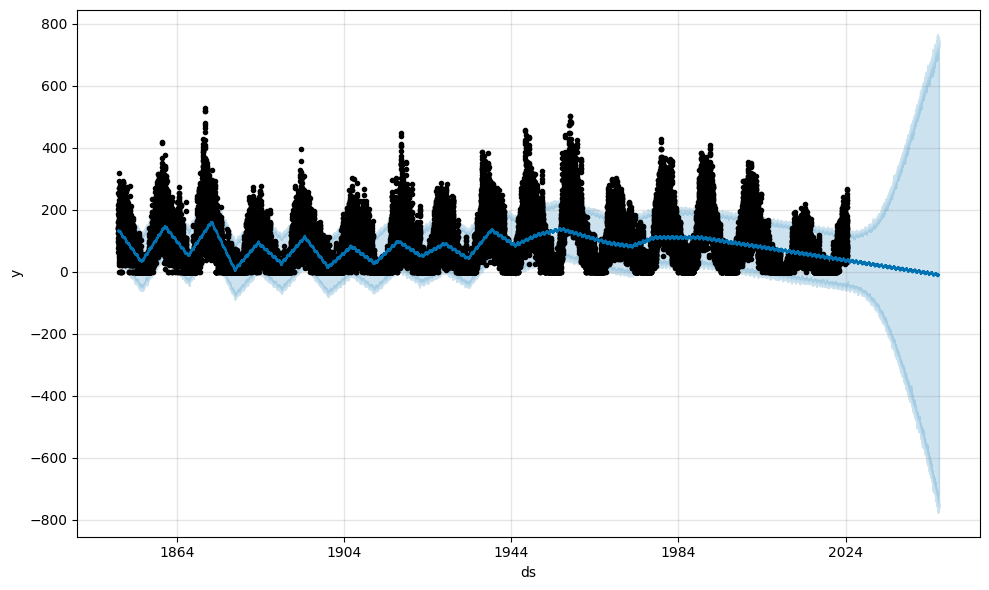

In [83]:
fig1 = m.plot(forecast)


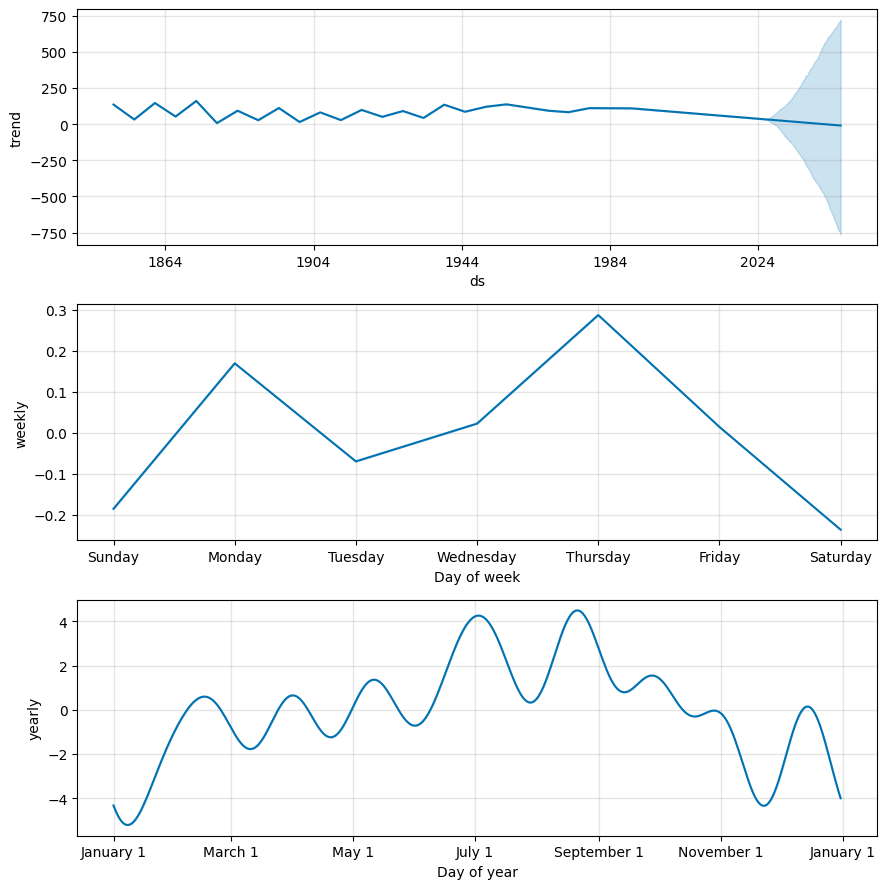

In [84]:
fig2 = m.plot_components(forecast)
